In [70]:
import numpy as np
import matplotlib.pyplot as plt
import csv 

# File path to read from
file_path = 'data.csv'

# Arrays to hold the data
temps = []
position = []


# Reading the data
with open(file_path, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        temps.append(float(row[0]))
        position.append(float(row[1]))

print("Time:", temps)
print("Position:", position)

Time: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.

In [71]:



# --- Données constantes ---
M = 70000  # Masse du train (kg)
g = 9.81  # Accélération gravitationnelle (m/s²)
A0, A1 = 780, 6.4  # Résistance au roulement (N, N/tonne)
B0, B1 = 0, 0.14  # Résistance au vent linéaire (N, N/tonne / km/h)
C0, C1 = 0.3634, 0  # Résistance au vent quadratique (N / (km/h)^2)
eta_motor = 0.8  # Rendement moteur
P_aux = 35000  # Puissance auxiliaire (W)

# Paramètres du réseau
V_sst = 790  # Tension des sous-stations (V)
R_sst = 33e-3  # Résistance interne des sous-stations (ohms)
rho_LAC = 131e-6  # Résistivité de la ligne aérienne de contact (ohm/m)
rho_rail = 18e-6  # Résistivité des rails (ohm/m)

# Données position-temps (exemple à remplacer par vos données réelles)
t = np.array(temps)
position = np.array(position)


# --- Calcul des grandeurs mécaniques ---
v = np.gradient(position, temps)  # Vitesse (m/s)
a = np.gradient(v, temps)  # Accélération (m/s²)
alpha = 0  # Pente supposée constante (rad)

# Résistance à l'avancement
F_resistive = (A0 + A1 * (M / 1000)) + (B0 + B1 * (M / 1000)) * v + (C0 + C1 * (M / 1000)) * v**2

# Force motrice
F_motrice = M * a + M * g * np.sin(alpha) + F_resistive

# Puissance mécanique
P_mec = F_motrice * v  # En watts

# Puissance totale demandée

#P_train = P_mec / eta_motor + P_aux  # En watts

P_train = [
    (P / eta_motor + P_aux) if P >= 0 else (P * eta_motor + P_aux)
    for P in P_mec
]


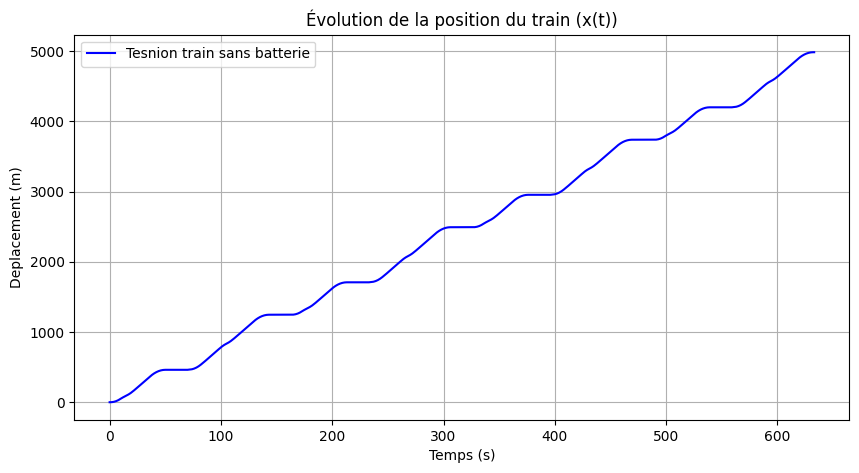

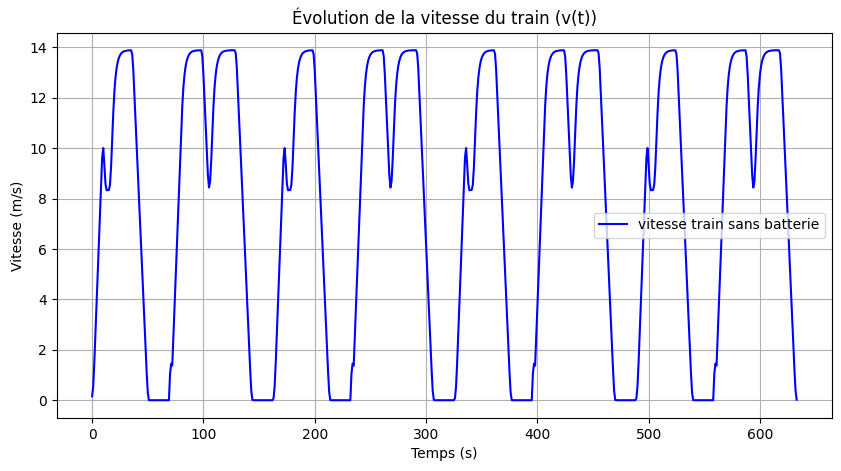

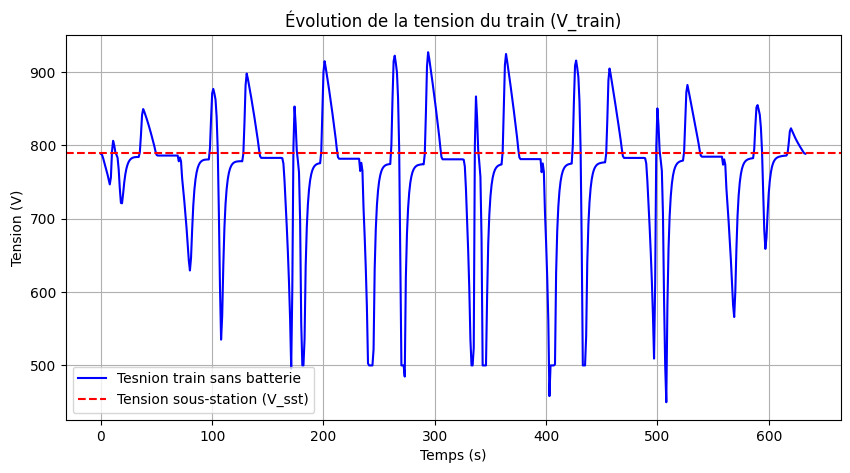

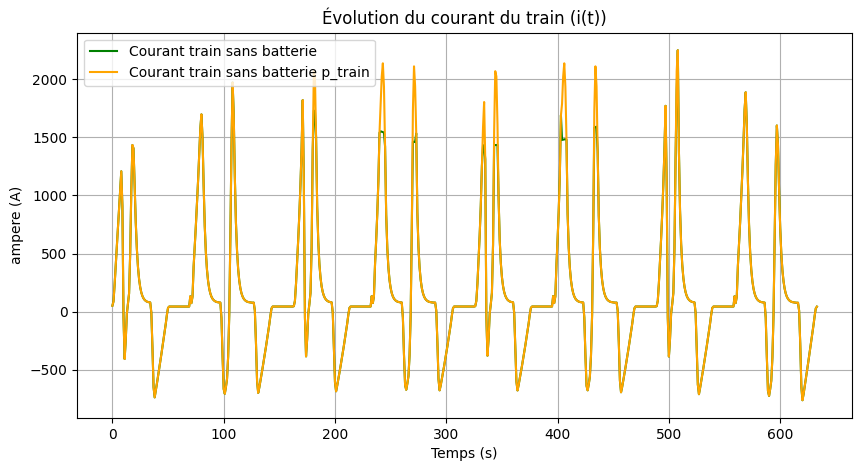

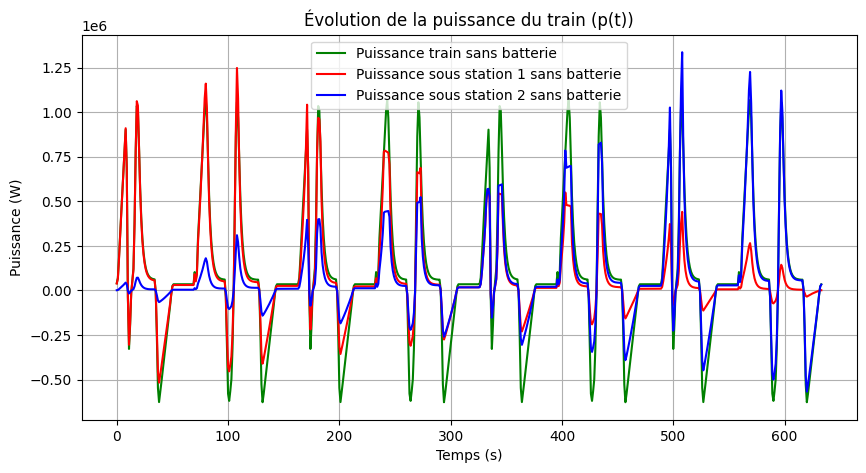

In [ ]:
# --- Simulation sans batterie ---
V_train_no_batt = []  
I_train = []
I_1 = []
I_2 = []
Psst_1 = []
Psst_2 = []

for i in range(len(temps)):
    # Résistances des segments de LAC et rail
    R_LAC1 = rho_LAC * position[i]  # Jusqu'au train
    R_LAC2 = rho_LAC * (5000 - position[i])  # Après le train
    R_rail1 = rho_rail * position[i]
    R_rail2 = rho_rail * (5000 - position[i])
    R_eq1=(R_sst + R_LAC1 + R_rail1)
    R_eq2=(R_sst + R_LAC2 + R_rail2)
    # Résistance équivalente (Req)
    R_eq = 1 / (1 / R_eq1 + 1 / R_eq2)
    # Calcul de la tension V_train à partir de l'équation quadratique
    
    delta = V_sst**2 - 4 * R_eq * P_train[i]
    if delta >= 0:
        V_train = 0.5 * (V_sst + np.sqrt(delta))
    else:
        V_train = np.NaN  # Cas où la tension est impossible
    
    V_train_no_batt.append(V_train)
    
    I_train.append((V_sst-V_train)/R_eq)
    I_1.append((V_sst-V_train)/R_eq*(R_eq2/(R_eq2+R_eq1)))
    I_2.append((V_sst-V_train)/R_eq*(R_eq1/(R_eq2+R_eq1)))
    
I_train=np.array(I_train)
I_1=np.array(I_1)
I_2=np.array(I_2)
# calcule des autres grandeurs:

Psst_1 = I_1 * V_sst
Psst_2 = I_2 * V_sst

# --- Tracé des résultats ---



# position
plt.figure(figsize=(10, 5))
plt.figure(1)
plt.plot(t, position, label="Tesnion train sans batterie", color="blue")
plt.xlabel("Temps (s)")
plt.ylabel("Deplacement (m)")
plt.title("Évolution de la position du train (x(t))")
plt.legend()
plt.grid()

# Vitesse
plt.figure(figsize=(10, 5))
plt.figure(2)
plt.plot(t, v, label="vitesse train sans batterie", color="blue")
plt.xlabel("Temps (s)")
plt.ylabel("Vitesse (m/s)")
plt.title("Évolution de la vitesse du train (v(t))")
plt.legend()
plt.grid()

# Tensions
plt.figure(figsize=(10, 5))
plt.figure(3)
plt.plot(t, V_train_no_batt, label="Tesnion train sans batterie", color="blue")
plt.axhline(V_sst, color="red", linestyle="--", label="Tension sous-station (V_sst)")
plt.xlabel("Temps (s)")
plt.ylabel("Tension (V)")
plt.title("Évolution de la tension du train (V_train)")
plt.legend()
plt.grid()

# courants
plt.figure(figsize=(10, 5))
plt.figure(4)
plt.plot(t, I_train, label="Courant train sans batterie", color="green")
plt.plot(t, I_1, label="Courant sous station 1 sans batterie", color="red")
plt.plot(t, I_2, label="Courant sous station 2 sans batterie", color="blue")
plt.xlabel("Temps (s)")
plt.ylabel("ampere (A)")
plt.title("Évolution du courant du train (i(t))")
plt.legend()
plt.grid()

# puissances
plt.figure(figsize=(10, 5))
plt.figure(5)
plt.plot(t, P_train, label="Puissance train sans batterie", color="green")
plt.plot(t, Psst_1, label="Puissance sous station 1 sans batterie", color="red")
plt.plot(t, Psst_2, label="Puissance sous station 2 sans batterie", color="blue")
plt.xlabel("Temps (s)")
plt.ylabel("Puissance (W)")
plt.title("Évolution de la puissance du train (p(t))")
plt.legend()
plt.grid()



In [73]:
# --- Simulation avec batterie ---
# Batterie
def batterie_simulation(C_batt, P_batt_max, Seuil, K, position, temps):
    """
    Simule le fonctionnement du train avec une batterie en utilisant des variables globales pour le contexte.

    Paramètres:
        C_batt (float): Capacité de la batterie en joules.
        P_batt_max (float): Puissance maximale de charge/décharge de la batterie (W).
        Seuil (float): Seuil de puissance apartir du quel on commence a consommé l'energie depuis la batterie
        K(float): relation entre le cout et la capacité de la batterie
        position (list): Liste des positions du train (m).
        temps (list): Liste des instants de temps (s).
        

    Retourne:
        V_train_with_batt (list): Tension du train avec la batterie (V).
        E_batt_history (list): Historique de l'énergie de la batterie (J).
        Cout_batt (float): cout de la batterie
        Delta_Vmax (float): la plus grande shute de tension

    """

    E_batt_max = C_batt  # Énergie initiale de la batterie (joules)
    P_batt = [0]
    V_train_with_batt = [790]
    E_batt_history = [E_batt_max]
    P_LAC = []  # Initialisation de P_LAC comme une liste vide
    P_rheostat = []  # Initialisation de P_rheostat comme une liste vide
    for i in range(len(temps)):
        # Résistances des segments de LAC et rail
        R_LAC1 = rho_LAC * position[i]  # Jusqu'au train
        R_LAC2 = rho_LAC * (5000 - position[i])  # Après le train
        R_rail1 = rho_rail * position[i]
        R_rail2 = rho_rail * (5000 - position[i])

        # Résistance équivalente (Req)
        R_eq = 1 / (1 / (R_sst + R_LAC1 + R_rail1) + 1 / (R_sst + R_LAC2 + R_rail2))

    for i in range(1, len(temps)):
        delta_t = temps[i] - temps[i-1]  # Le pas de temps (1s ici, mais il peut être ajusté)
        
        if P_train[i] <= 0:  # Le train freine
            if E_batt_history[-1] < E_batt_max:  # Batterie pas pleine
                P_batt.append(max(P_train[i], -P_batt_max))  # Recharge dans la limite de P_batt_max the absolute value !!
                E_batt_history.append(min(E_batt_max, E_batt_history[-1] - P_batt[-1] * delta_t))  # Mise à jour de l'énergie de la batterie
                P_rheostat.append(P_batt[-1] - P_train[i]) # Le reste va au rhéostat because we have p train <0

            else:  # Batterie pleine
                P_batt.append(0)
                P_rheostat.append(-P_train[i])  # Toute l'énergie va au rhéostat
                E_batt_history.append(E_batt_history[-1])
            P_LAC.append(0)  # Pas de demande à la LAC pendant le freinage

        elif P_train[i]>Seuil:  # Le train accélère
            if E_batt_history[-1] > 0:  # Batterie pas vide
                P_batt.append(min(P_train[i], P_batt_max, E_batt_history[-1] / delta_t))  # Limite la puissance fournie par la batterie
                E_batt_history.append(max(0, E_batt_history[-1] - P_batt[-1] * delta_t))  # Mise à jour de l'énergie de la batterie
                P_LAC.append(P_train[i] - P_batt[-1])  # Complément demandé à la LAC

            else:  # Batterie vide
                P_batt.append(0)
                E_batt_history.append(E_batt_history[-1])  # Pas d'énergie supplémentaire, la batterie reste à zéro
                P_LAC.append(P_train[i])  # Toute l'énergie vient de la LAC
        else :
            P_batt.append(0)
            E_batt_history.append(E_batt_history[-1])  # Pas d'énergie supplémentaire, la batterie reste à zéro
            P_LAC.append(P_train[i])  # Toute l'énergie vient de la LAC


        # Calcul de la tension V_train
        R_eq = 1 / (1 / (R_sst + R_LAC1 + R_rail1) + 1 / (R_sst + R_LAC2 + R_rail2))  # Calcul de R_eq
        delta = V_sst**2 - 4 * R_eq * P_LAC[-1]  # Calcul du discriminant pour la tension

        if delta > 0:
            V_train = 0.5 * (V_sst + np.sqrt(delta))  # Calcul de la tension
        else:
            V_train = np.nan  # Cas où la tension est impossible 
            print (1)     
        
        V_train_with_batt.append(V_train)  # Stocke la tension à chaque instant
        # Correction de l'ajout final

    if len(V_train_with_batt) < len(t):
        V_train_with_batt.append(V_train_with_batt[-1])  # Ajout de la dernière valeur de la tension

    
    Delta_Vmax=V_sst-np.min(V_train_with_batt)
    cout_batt=K*C_batt

    return V_train_with_batt, E_batt_history, Delta_Vmax, cout_batt


def plot_simulation_results():
    
    # --- Tracé des résultats ---
    print("Longueur de t:", len(t))
    print("Longueur de V_train_no_batt:", len(V_train_no_batt))
    print("Longueur de V_train_with_batt:", len(V_train_with_batt))
    print("Longueur E_batt_history :", len(E_batt_history))

    assert len(t) == len(V_train_no_batt), f"Erreur : longueur de t ({len(t)}) et de V_train_no_batt ({len(V_train_no_batt)}) ne sont pas égales."
    assert len(t) == len(V_train_with_batt), f"Erreur : longueur de t ({len(t)}) et de V_train_with_batt ({len(V_train_with_batt)}) ne sont pas égales."
    # Tensions
    plt.figure(7)
    plt.figure(figsize=(14, 8))
    #plt.plot(t, V_train_no_batt, label="Sans batterie", color="blue")
    plt.plot(t, V_train_with_batt, label="Avec batterie", color="green")
    plt.axhline(V_sst, color="red", linestyle="--", label="Tension sous-station (V_sst)")
    plt.xlabel("Temps (s)")
    plt.ylabel("Tension (V)")
    plt.title("Évolution de la tension du train (V_train)")
    plt.legend()
    plt.grid()

    # puissances

    plt.figure(8)
    plt.figure(figsize=(10, 5))
    plt.plot(t, P_train, label="Puissance train sans batterie", color="green")
    plt.xlabel("Temps (s)")
    plt.ylabel("Puissance (W)")
    plt.title("Évolution de la puissance du train (p(t))")
    plt.legend()
    plt.grid()

    # Énergie de la batterie
    plt.figure(6)
    plt.figure(figsize=(9, 5))
    plt.plot(t, np.array(E_batt_history) / 1e6, label="Énergie de la batterie (MJ)", color="orange")
    plt.xlabel("Temps (s)")
    plt.ylabel("Énergie (MJ)")
    plt.title("Évolution de l'énergie de la batterie")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()
    

Longueur de t: 634
Longueur de V_train_no_batt: 634
Longueur de V_train_with_batt: 634
Longueur E_batt_history : 634


<Figure size 640x480 with 0 Axes>

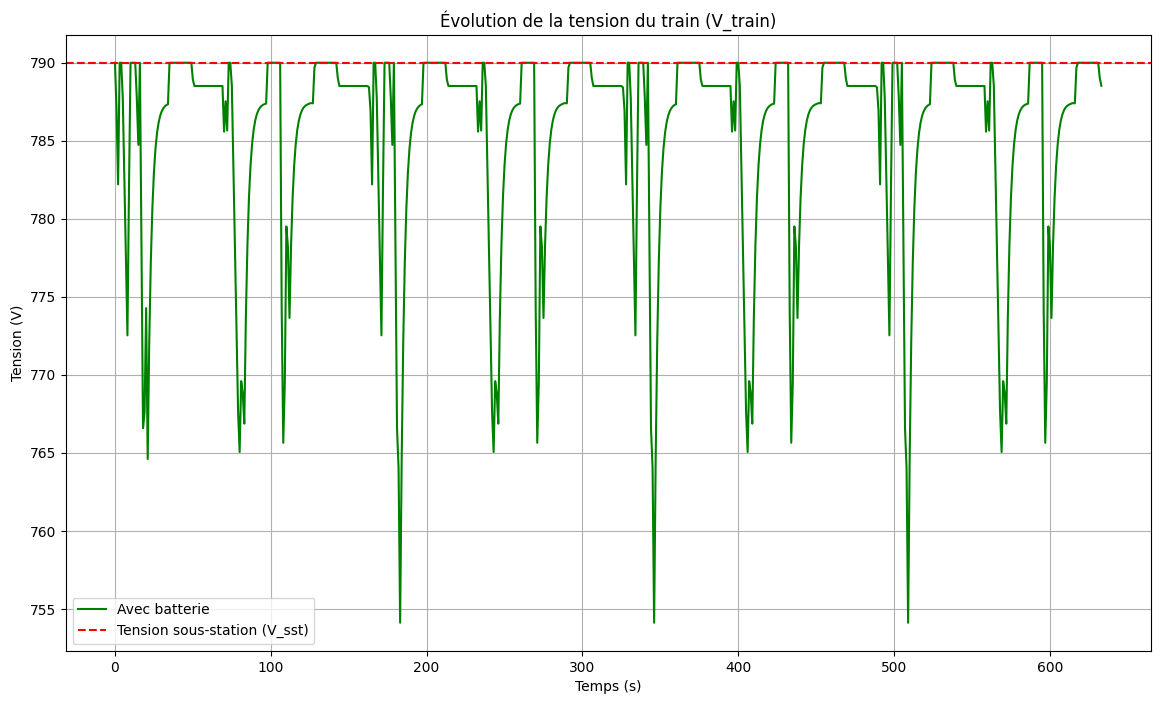

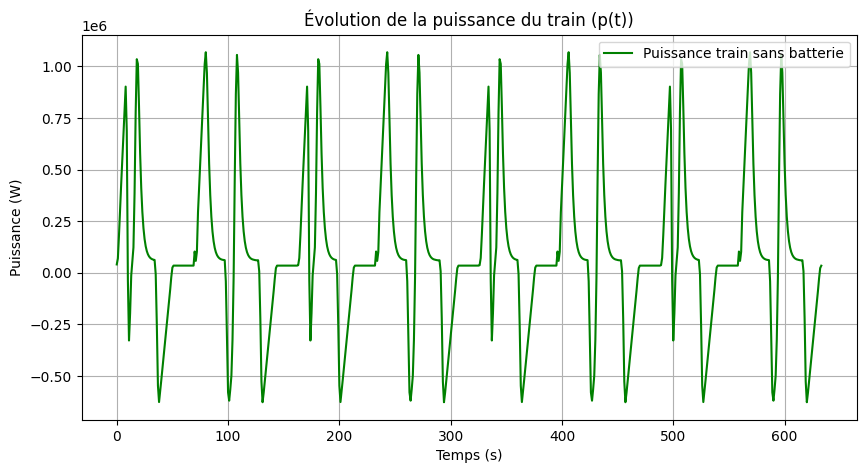

<Figure size 640x480 with 0 Axes>

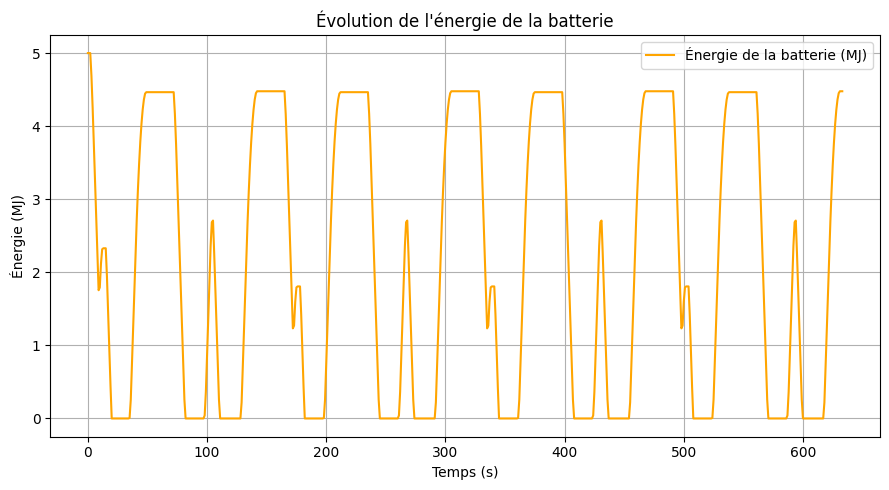

In [74]:
[V_train_with_batt, E_batt_history, Delta_Vmax ,cout_batt]= batterie_simulation(5e6, 500e3, 2e5, 3, position, temps)
plot_simulation_results()